### Lego Data Analysis - Rebrickable

The data set is from https://rebrickable.com/downloads/

From the rebrickable website - The LEGO Parts/Sets/Colors and Inventories of every official LEGO set in the Rebrickable database is available for download as csv files here. These files are automatically updated daily. If you need more details, you can use the API which provides real-time data, but has rate limits that prevent bulk downloading of data.

### Lego Data Model

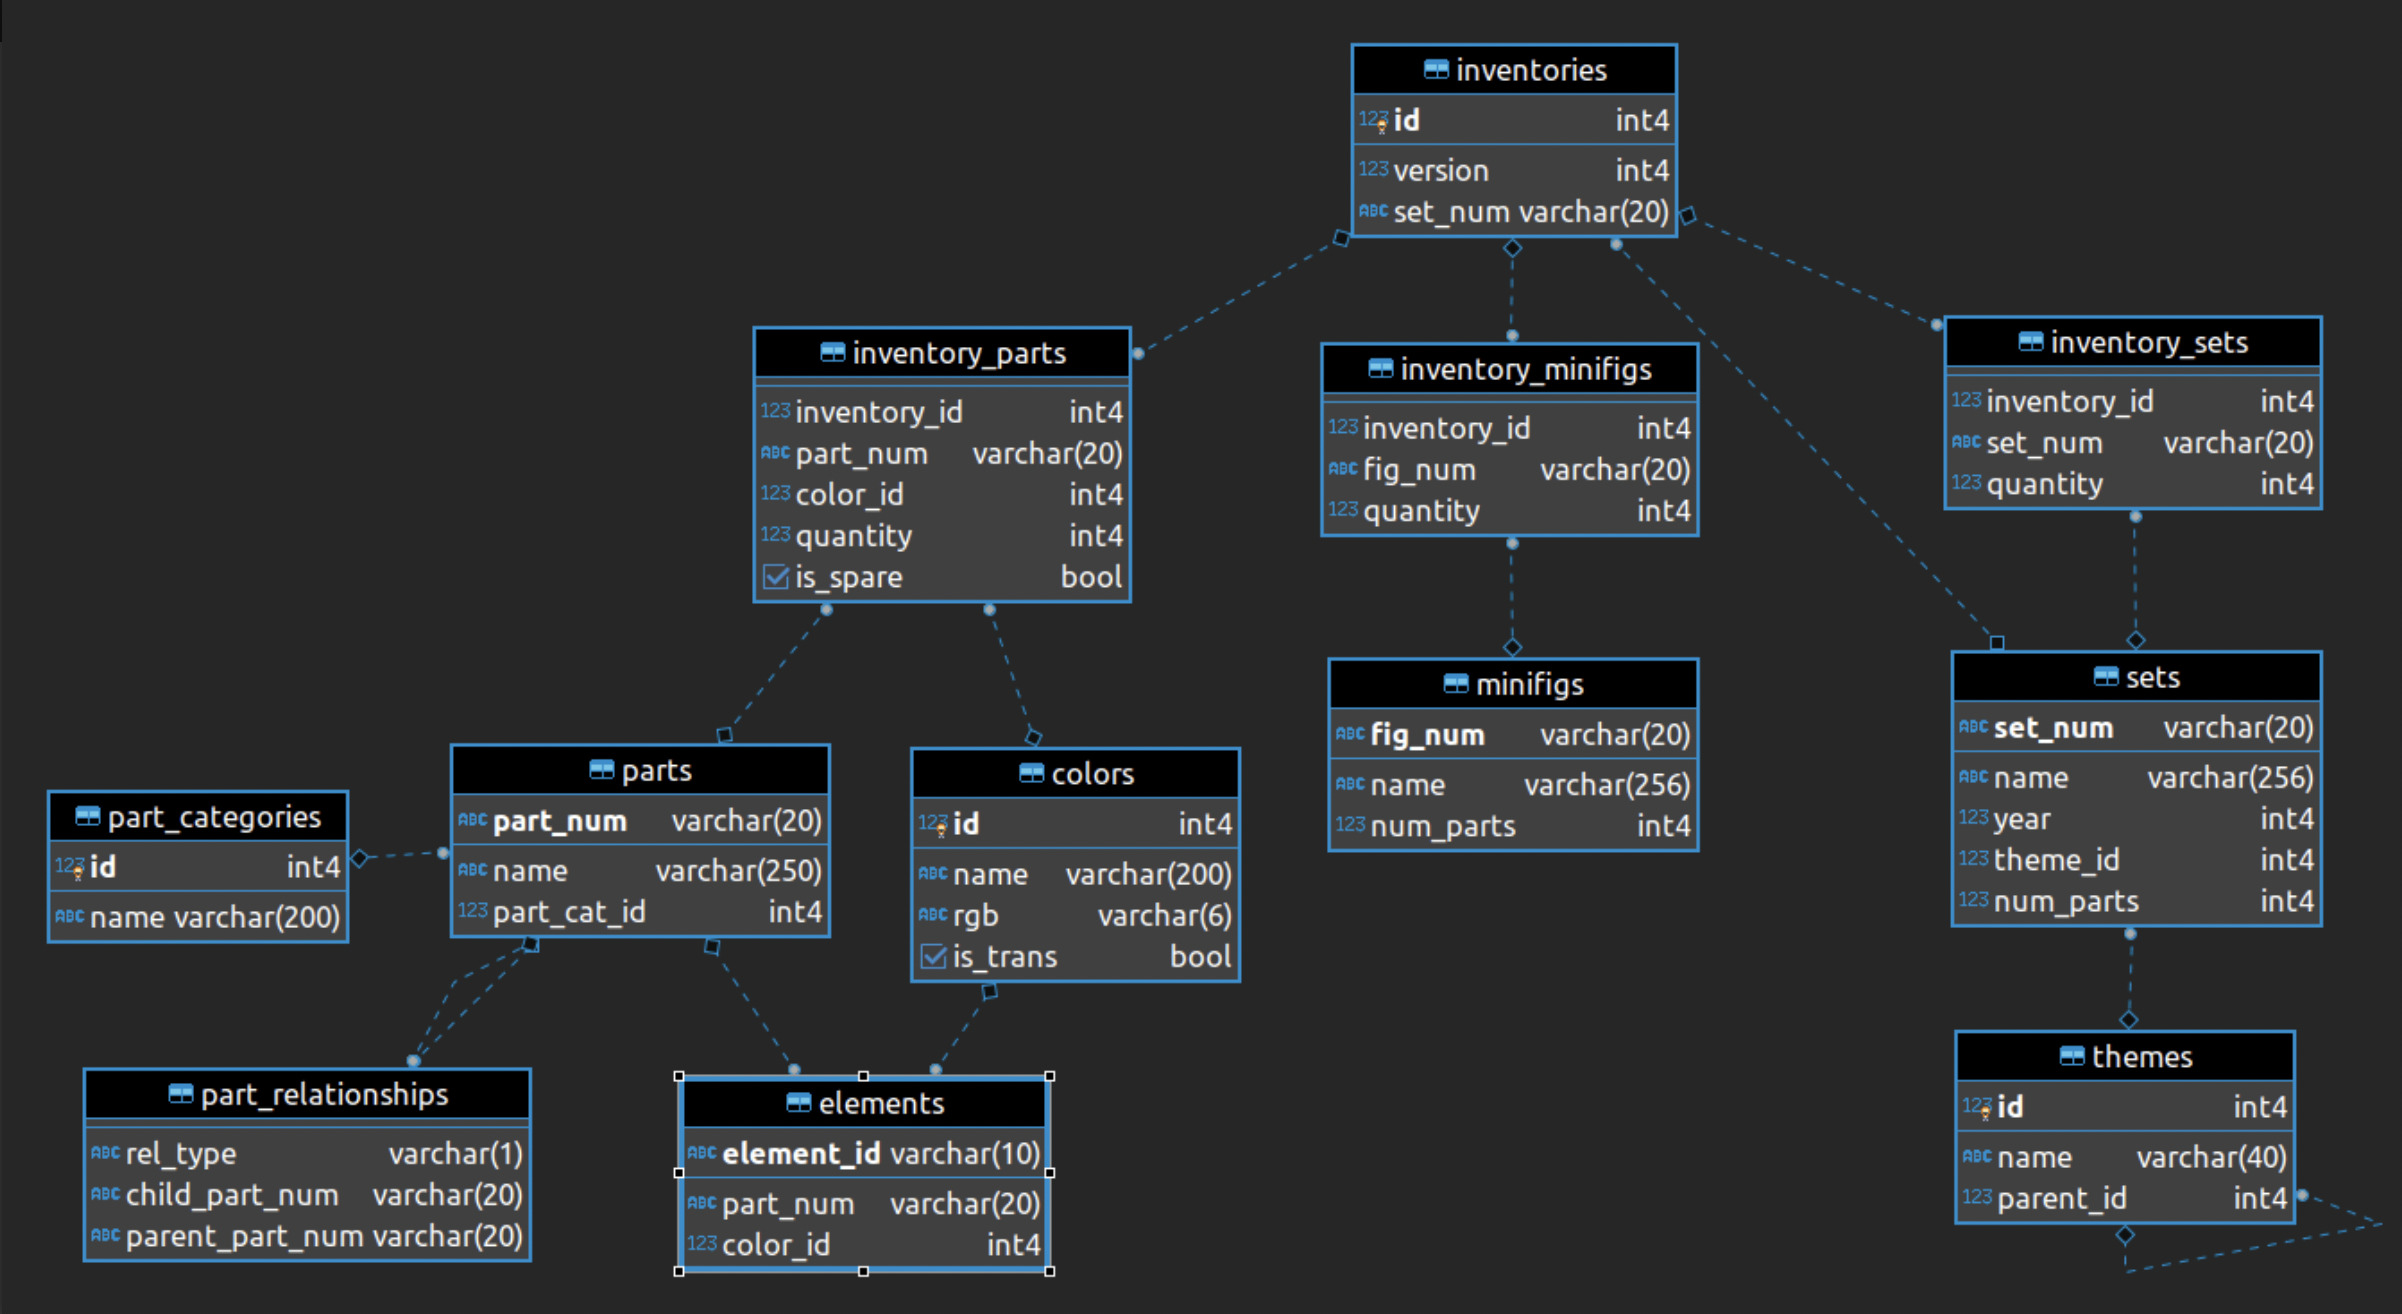

### Import Libraries

In [1]:
import pandas as pd
import numpy as np


### Getting Data

In [3]:
sets = pd.read_csv('data_source/sets.csv')
sets

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1979,67,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
18979,XWING-1,Mini X-Wing Fighter,2019,158,60
18980,XWING-2,X-Wing Trench Run,2019,158,52
18981,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413
18982,YTERRIER-1,Yorkshire Terrier,2018,598,0


In [4]:
themes = pd.read_csv('data_source/themes.csv')
themes

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0
...,...,...,...
439,715,Marvel,535.0
440,716,Modulex,NaN
441,717,Speed Racer,NaN
442,718,Series 22 Minifigures,535.0


### Display top 10 rows of the 'sets' dataset

In [8]:
sets.head(10)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1979,67,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
5,0014-1,Space Mini-Figures,1979,143,12
6,0015-1,Space Mini-Figures,1979,143,18
7,0016-1,Castle Mini Figures,1979,186,15
8,002-1,4.5V Samsonite Gears Motor Set,1965,1,3
9,003-1,Master Mechanic Set,1966,366,403


### Display top 10 rows of the 'sets' dataset

In [9]:
sets.tail(10)

,set_num,name,year,theme_id,num_parts
18974,XBOXGAME-1,Batman the Videogame - Xbox 360,2008,501,0
18975,XBOXGAME-2,Bionicle Heroes - Xbox 360,2006,501,0
18976,XBOXGAME-3,DC Super-Villains - Xbox One,2018,501,0
18977,XBOXGAME-9,Star Wars: The Video Game - Xbox,2005,501,0
18978,XMASTREE-1,Christmas Tree,2019,410,26
18979,XWING-1,Mini X-Wing Fighter,2019,158,60
18980,XWING-2,X-Wing Trench Run,2019,158,52
18981,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413
18982,YTERRIER-1,Yorkshire Terrier,2018,598,0
18983,ZX8000-1,ZX 8000 LEGO Sneaker,2020,501,0


### Check datatype of each column

In [11]:
sets.dtypes

set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
dtype: object

### Check null values in sets

In [13]:
sets.isnull().sum()

set_num      0
name         0
year         0
theme_id     0
num_parts    0
dtype: int64

### Check null values in themes

In [14]:
themes.isnull().sum()

id             0
name           0
parent_id    138
dtype: int64

### Check how many rows and columns there are in our dataset

In [18]:
sets.shape

(18984, 5)

In [19]:
themes.shape

(444, 3)

In [20]:
# total number of records
len(sets)

18984

In [21]:
sets.info

<bound method DataFrame.info of            set_num                             name  year  theme_id  num_parts
0            001-1                            Gears  1965         1         43
1           0011-2                Town Mini-Figures  1979        67         12
2           0011-3       Castle 2 for 1 Bonus Offer  1987       199          0
3           0012-1               Space Mini-Figures  1979       143         12
4           0013-1               Space Mini-Figures  1979       143         12
...            ...                              ...   ...       ...        ...
18979      XWING-1              Mini X-Wing Fighter  2019       158         60
18980      XWING-2                X-Wing Trench Run  2019       158         52
18981  YODACHRON-1  Yoda Chronicles Promotional Set  2013       158        413
18982   YTERRIER-1                Yorkshire Terrier  2018       598          0
18983     ZX8000-1             ZX 8000 LEGO Sneaker  2020       501          0

[18984 rows x 5 col

### Merge data

In [24]:
# If the two sets of data have the same information, distinguish between which is which by appending the suffixes chosen
sets_themes = pd.merge(sets, themes, how = 'left', left_on = 'theme_id', right_on = 'id', suffixes =('_sets','_themes'))
sets_themes.head()

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id
0,001-1,Gears,1965,1,43,1,Technic,NaN
1,0011-2,Town Mini-Figures,1979,67,12,67,Classic Town,50.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,199,Lion Knights,186.0
3,0012-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0
4,0013-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0


In [25]:
sets_themes.info

<bound method DataFrame.info of            set_num                        name_sets  year  theme_id  \
0            001-1                            Gears  1965         1   
1           0011-2                Town Mini-Figures  1979        67   
2           0011-3       Castle 2 for 1 Bonus Offer  1987       199   
3           0012-1               Space Mini-Figures  1979       143   
4           0013-1               Space Mini-Figures  1979       143   
...            ...                              ...   ...       ...   
18979      XWING-1              Mini X-Wing Fighter  2019       158   
18980      XWING-2                X-Wing Trench Run  2019       158   
18981  YODACHRON-1  Yoda Chronicles Promotional Set  2013       158   
18982   YTERRIER-1                Yorkshire Terrier  2018       598   
18983     ZX8000-1             ZX 8000 LEGO Sneaker  2020       501   

       num_parts   id   name_themes  parent_id  
0             43    1       Technic        NaN  
1             12 

### Analysing the data with typical questions

In [35]:
# What is the total number of parts per theme?
#Using a groupby statement, selecting the relevant columns and sorting num_parts values by desc order
num_parts_per_theme = sets_themes.groupby('name_themes').sum().reset_index()
num_parts_per_theme = num_parts_per_theme[['name_themes','num_parts']].sort_values('num_parts', ascending = False)
num_parts_per_theme

,name_themes,num_parts
303,Technic,221214
292,Star Wars,220923
66,Creator Expert,130702
64,Creator,102357
209,Ninjago,96653
...,...,...
16,Aquazone,26
354,Zooters,25
229,Powered Up,21
339,Value Packs,1


In [36]:
# What is the total number of parts per year?
num_parts_per_year = sets_themes.groupby('year').sum().reset_index()
num_parts_per_year = num_parts_per_year[['year','num_parts']].sort_values('num_parts', ascending = False)
num_parts_per_year

#2021 had the highest number of parts produced

,year,num_parts
70,2021,264848
69,2020,211871
68,2019,191568
66,2017,178609
67,2018,171723
...,...,...
5,1956,246
3,1954,117
8,1959,65
2,1953,50


In [37]:
# How many sets were created in each century in the dataset?

We have to create a century column, derived from year to the sets_themes dataset

In [41]:
uniqueyear = sets_themes['year'].unique()
uniqueyear.sort()
uniqueyear

array([1949, 1950, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022])

In [42]:
#20th century = 1949 - 2000
#21st century = > 2000

In [44]:
sets_themes['year'] > 2000
#where year > 2000 = 21st century else 20th century
sets_themes['century'] = np.where(sets_themes['year'] > 2000, '21st_century', '20th_century')

In [45]:
sets_themes

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id,century
0,001-1,Gears,1965,1,43,1,Technic,NaN,20th_century
1,0011-2,Town Mini-Figures,1979,67,12,67,Classic Town,50.0,20th_century
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,199,Lion Knights,186.0,20th_century
3,0012-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0,20th_century
4,0013-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0,20th_century
...,...,...,...,...,...,...,...,...,...
18979,XWING-1,Mini X-Wing Fighter,2019,158,60,158,Star Wars,NaN,21st_century
18980,XWING-2,X-Wing Trench Run,2019,158,52,158,Star Wars,NaN,21st_century
18981,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,158,Star Wars,NaN,21st_century
18982,YTERRIER-1,Yorkshire Terrier,2018,598,0,598,Promotional,NaN,21st_century


In [50]:
set_num_per_century = sets_themes.groupby('century').count().reset_index()
set_num_per_century [['century','set_num']]


,century,set_num
0,20th_century,4858
1,21st_century,14126


In [62]:
# What percentage of sets released in the 21st century were Trains themed
century_21 = sets_themes [sets_themes['century'] == '21st_century']
Train = century_21[century_21['name_themes'].str.contains('Train')]
Train

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id,century
68,10001-1,Metroliner,2001,233,787,233,Train,NaN,21st_century
69,10002-1,Railroad Club Car,2001,233,293,233,Train,NaN,21st_century
145,10052-1,Intelligent Locomotive (Explore),2003,634,7,634,Trains,504.0,21st_century
171,10078-1,Train Connection Wire,2003,257,1,257,Train,254.0,21st_century
414,10506-1,Train Accessory Set,2013,634,24,634,Trains,504.0,21st_century
...,...,...,...,...,...,...,...,...,...
14103,7939-1,Cargo Train,2010,66,839,66,Trains,52.0,21st_century
14149,7996-1,Double Crossover Track,2007,66,4,66,Trains,52.0,21st_century
14150,7997-1,Train Station,2007,66,387,66,Trains,52.0,21st_century
18301,K7895-1,Oval Track for RC Trains,2006,66,0,66,Trains,52.0,21st_century


In [65]:
#century_21.shape
century_21.shape[0]

14126

In [64]:
#Train.shape
Train.shape[0]

63

In [74]:
#Running the calculation

round(Train.shape[0] / century_21.shape[0] *100 , 4)

0.446

In [75]:
#The percentage of sets that were train themed in the 21st century are 0.446%

In [76]:
# What are the percentage of sets released in the 21st century that are Disney themed?

# We already have century_21 data set created
# we just need to create a disney dataframe

In [77]:
Disney = century_21[century_21['name_themes'].str.contains('Disney')]
Disney

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id,century
417,10509-1,Dusty and Chug,2013,627,16,627,Disney Planes,504.0,21st_century
419,10510-1,Ripslinger's Air Race,2013,627,40,627,Disney Planes,504.0,21st_century
420,10511-1,Skipper's Flight School,2013,627,53,627,Disney Planes,504.0,21st_century
424,10515-1,Ariel's Undersea Castle,2013,640,39,640,Disney Princess,504.0,21st_century
425,10516-1,Ariel's Magical Boat Ride,2012,640,30,640,Disney Princess,504.0,21st_century
...,...,...,...,...,...,...,...,...,...
17937,BELLE-1,Belle's Castle,2016,579,72,579,Disney Princess,NaN,21st_century
17987,CINDERELLASCASTLE-1,Cinderella’s Castle,2017,608,102,608,Disney,NaN,21st_century
18791,ROSE-1,The Beast's Enchanted Rose,2017,608,0,608,Disney,NaN,21st_century
18888,TRUCOGSWORTH-1,Cogsworth,2016,608,48,608,Disney,NaN,21st_century


In [81]:
#Disney.shape
Disney.shape[0]

180

In [82]:
round( Disney.shape[0] / century_21.shape[0] *100 , 4)

1.2742

In [83]:
# 1.27% of the data set were Disney themed

In [84]:
#What is the most popular theme by year in terms of sets released in the 21st century?

In [94]:
popular_theme_per_year = century_21.groupby(['year','name_themes']).count().reset_index()
popular_theme_per_year = popular_theme_per_year[['year','name_themes','set_num']].sort_values('set_num', ascending = False)
# Now we want distinct values only, one for each year, since the data is sorted by descending we will remove the duplicates with a lower set_num value
popular_theme_per_year.drop_duplicates('year').sort_values('year', ascending = False)


,year,name_themes,set_num
1385,2022,Gear,38
1327,2021,Gear,226
1252,2020,Gear,150
1181,2019,Gear,173
1104,2018,Gear,115
1035,2017,Gear,141
953,2016,Gear,98
866,2015,Gear,87
786,2014,Gear,97
707,2013,Gear,94


In [95]:
# observation: 'Gear' seems to be the most popular theme as a recurring instance during the 21st century

In [96]:
# What is the most produced colour of lego in terms of quantity of parts?

In [103]:
# Import the required data
colors = pd.read_csv('data_source/colors.csv')
colors


,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
211,1085,Two-tone Silver,737271,f
212,1086,Pearl Lime,6A7944,f
213,1087,Duplo Pink,FF879C,f
214,1088,Medium Brown,755945,f


In [104]:
parts = pd.read_csv('data_source/inventory_parts.csv')
parts

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,stickerupn0077,9999,1,f
3,1,upn0342,0,1,f
4,1,upn0350,25,1,f
...,...,...,...,...,...
1010257,132360,3626cpr3559,379,1,f
1010258,132360,39260,148,1,f
1010259,132360,78940,379,1,f
1010260,132360,970c00pr2284,308,1,f


In [107]:
# merge the two datasets

color_inventory = pd.merge(parts, colors, how = 'left', left_on ='color_id', right_on = 'id')
color_inventory

,inventory_id,part_num,color_id,quantity,is_spare,id,name,rgb,is_trans
0,1,48379c01,72,1,f,72,Dark Bluish Gray,6C6E68,f
1,1,48395,7,1,f,7,Light Gray,9BA19D,f
2,1,stickerupn0077,9999,1,f,9999,[No Color/Any Color],05131D,f
3,1,upn0342,0,1,f,0,Black,05131D,f
4,1,upn0350,25,1,f,25,Orange,FE8A18,f
...,...,...,...,...,...,...,...,...,...
1010257,132360,3626cpr3559,379,1,f,379,Sand Blue,6074A1,f
1010258,132360,39260,148,1,f,148,Pearl Dark Gray,575857,f
1010259,132360,78940,379,1,f,379,Sand Blue,6074A1,f
1010260,132360,970c00pr2284,308,1,f,308,Dark Brown,352100,f


In [108]:
#rename name column to color_name

In [110]:
color_inventory.rename(columns={'name':'color_name'}, inplace = True)

In [112]:
color_inventory

,inventory_id,part_num,color_id,quantity,is_spare,id,color_name,rgb,is_trans
0,1,48379c01,72,1,f,72,Dark Bluish Gray,6C6E68,f
1,1,48395,7,1,f,7,Light Gray,9BA19D,f
2,1,stickerupn0077,9999,1,f,9999,[No Color/Any Color],05131D,f
3,1,upn0342,0,1,f,0,Black,05131D,f
4,1,upn0350,25,1,f,25,Orange,FE8A18,f
...,...,...,...,...,...,...,...,...,...
1010257,132360,3626cpr3559,379,1,f,379,Sand Blue,6074A1,f
1010258,132360,39260,148,1,f,148,Pearl Dark Gray,575857,f
1010259,132360,78940,379,1,f,379,Sand Blue,6074A1,f
1010260,132360,970c00pr2284,308,1,f,308,Dark Brown,352100,f


In [117]:
popularcolor = color_inventory.groupby('color_name').sum().reset_index()
popularcolor = popularcolor[['color_name','quantity']].sort_values('quantity', ascending=False)
popularcolor.head(10)

,color_name,quantity
1,Black,639078
58,Light Bluish Gray,379991
198,White,376184
23,Dark Bluish Gray,267530
137,Red,254091
2,Blue,177143
199,Yellow,175470
155,Tan,123870
138,Reddish Brown,104900
60,Light Gray,101729


In [ ]:
# The most popular colours ranked by quantity are listed above